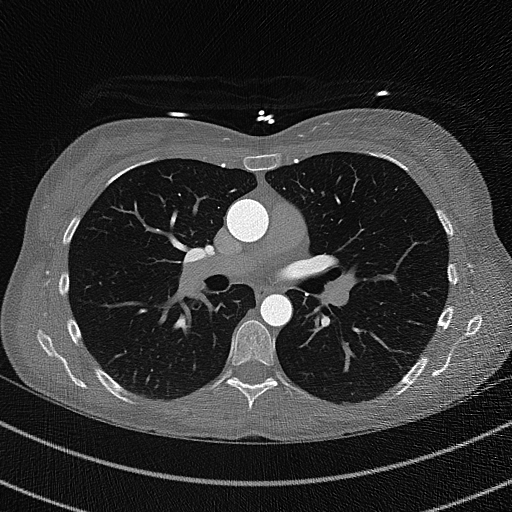

In [2]:
import numpy as np
import scipy.ndimage
from PIL import Image
import scipy.misc, cv2

# opening the image and converting it to grayscale
a = Image.open('withcontrast1.png').convert('L')
a

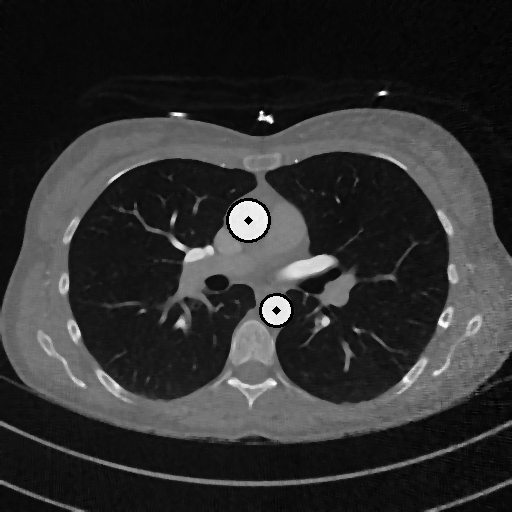

In [8]:
import numpy as np
import scipy.ndimage
from PIL import Image
import scipy.misc, cv2

# opening the image and converting it to grayscale
a = Image.open('withcontrast1.png').convert('L')
a = scipy.misc.fromimage(a)
# median filter is performed on the 
# image to remove noise 
img = scipy.ndimage.filters.median_filter(a,size=5)
# circles are determined using 
# Hough circles transform
circles = cv2.HoughCircles(img,
          cv2.HOUGH_GRADIENT,1,10,param1=100,
          param2=30,minRadius=10,maxRadius=30)
# circles is arounded to unsigned integer 16
circles = np.uint16(np.around(circles))
# For each detected circle
for i in circles[0,:]:
	# an outer circle is drawn for visualization
    cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),2)  
	# its center is marked
    cv2.circle(img,(i[0],i[1]),2,(0,0,255),3)     

# converting img from an ndarray to an image 
cimg = scipy.misc.toimage(img)
# saving the image as houghcircles_output.png
#cimg.save('../Figures/houghcircles_output.png')
cimg